# Requirements

In [1]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import math

## Customer Personality Analysis

## Read the dataset

# Dataset Description

## Attributes

### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years

### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

### Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
The column Response is the prediction target.
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


In [18]:
df = pd.read_csv("./content/marketing_campaign.csv")

Load the dataset into a `pandas` data frame.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1932 non-null   float64
 1   Year_Birth           1925 non-null   float64
 2   Education            1921 non-null   object 
 3   Marital_Status       1924 non-null   object 
 4   Income               1855 non-null   float64
 5   Kidhome              1921 non-null   float64
 6   Teenhome             1950 non-null   float64
 7   Dt_Customer          1929 non-null   object 
 8   Recency              1930 non-null   float64
 9   MntWines             1907 non-null   float64
 10  MntFruits            1930 non-null   float64
 11  MntGoldProds         1921 non-null   float64
 12  NumDealsPurchases    1936 non-null   float64
 13  NumWebPurchases      1907 non-null   float64
 14  NumCatalogPurchases  1900 non-null   float64
 15  NumStorePurchases    1915 non-null   f

In [20]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,1957.0,Graduation,Single,58138.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,NaN,1954.0,NaN,Single,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,1965.0,Graduation,NaN,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,1984.0,Graduation,NaN,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,NaN,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0


Explore the dataset using visualizations of your choice.

<Axes: >

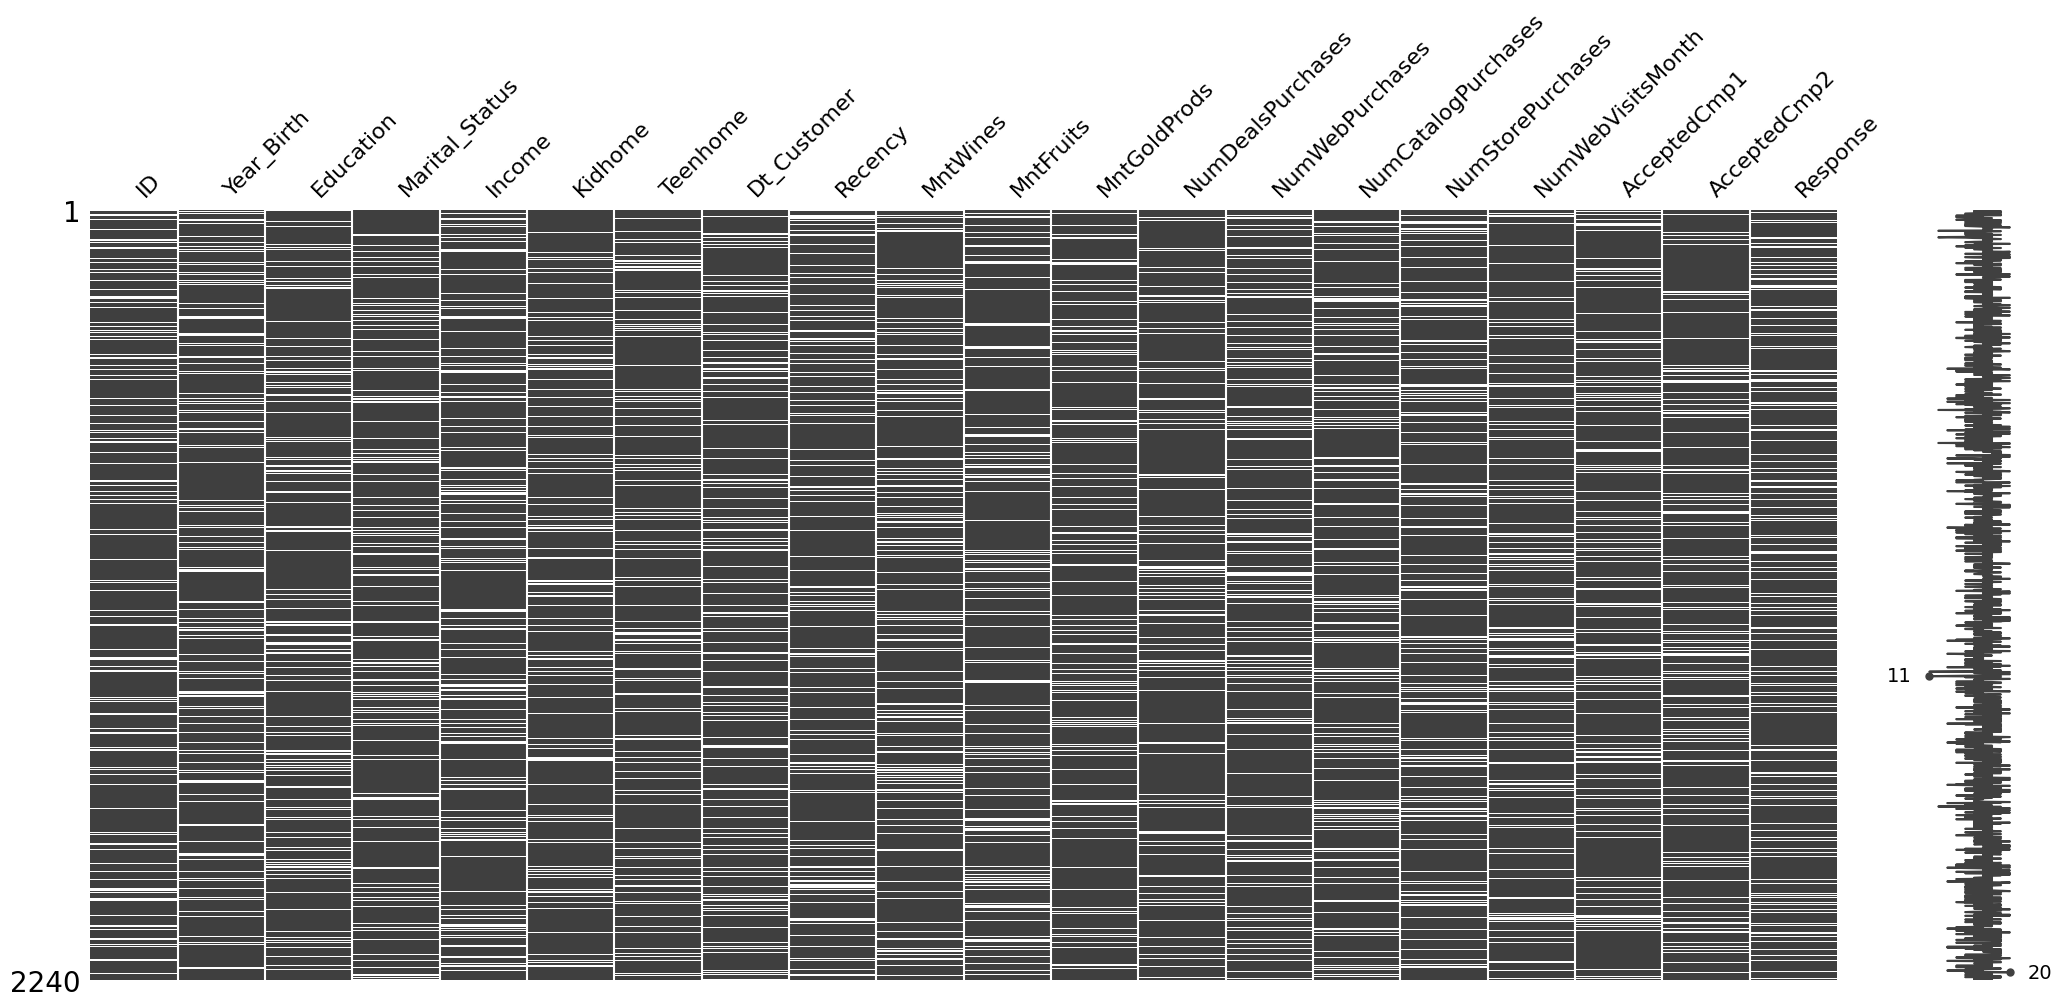

In [21]:
msno.matrix(df)

Check if the dataset is balanced.

<Axes: >

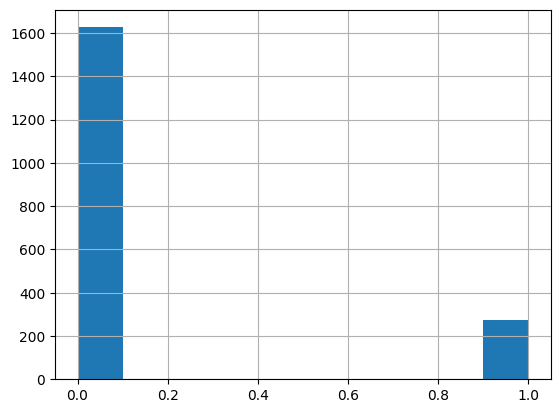

In [22]:
df["Response"].hist()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [23]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index":"column",0:"missing_per"})
missing_percent

,column,missing_per
0,ID,13.750000
1,Year_Birth,14.062500
2,Education,14.241071
3,Marital_Status,14.107143
4,Income,17.187500
5,Kidhome,14.241071
6,Teenhome,12.946429
7,Dt_Customer,13.883929
8,Recency,13.839286
9,MntWines,14.866071


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

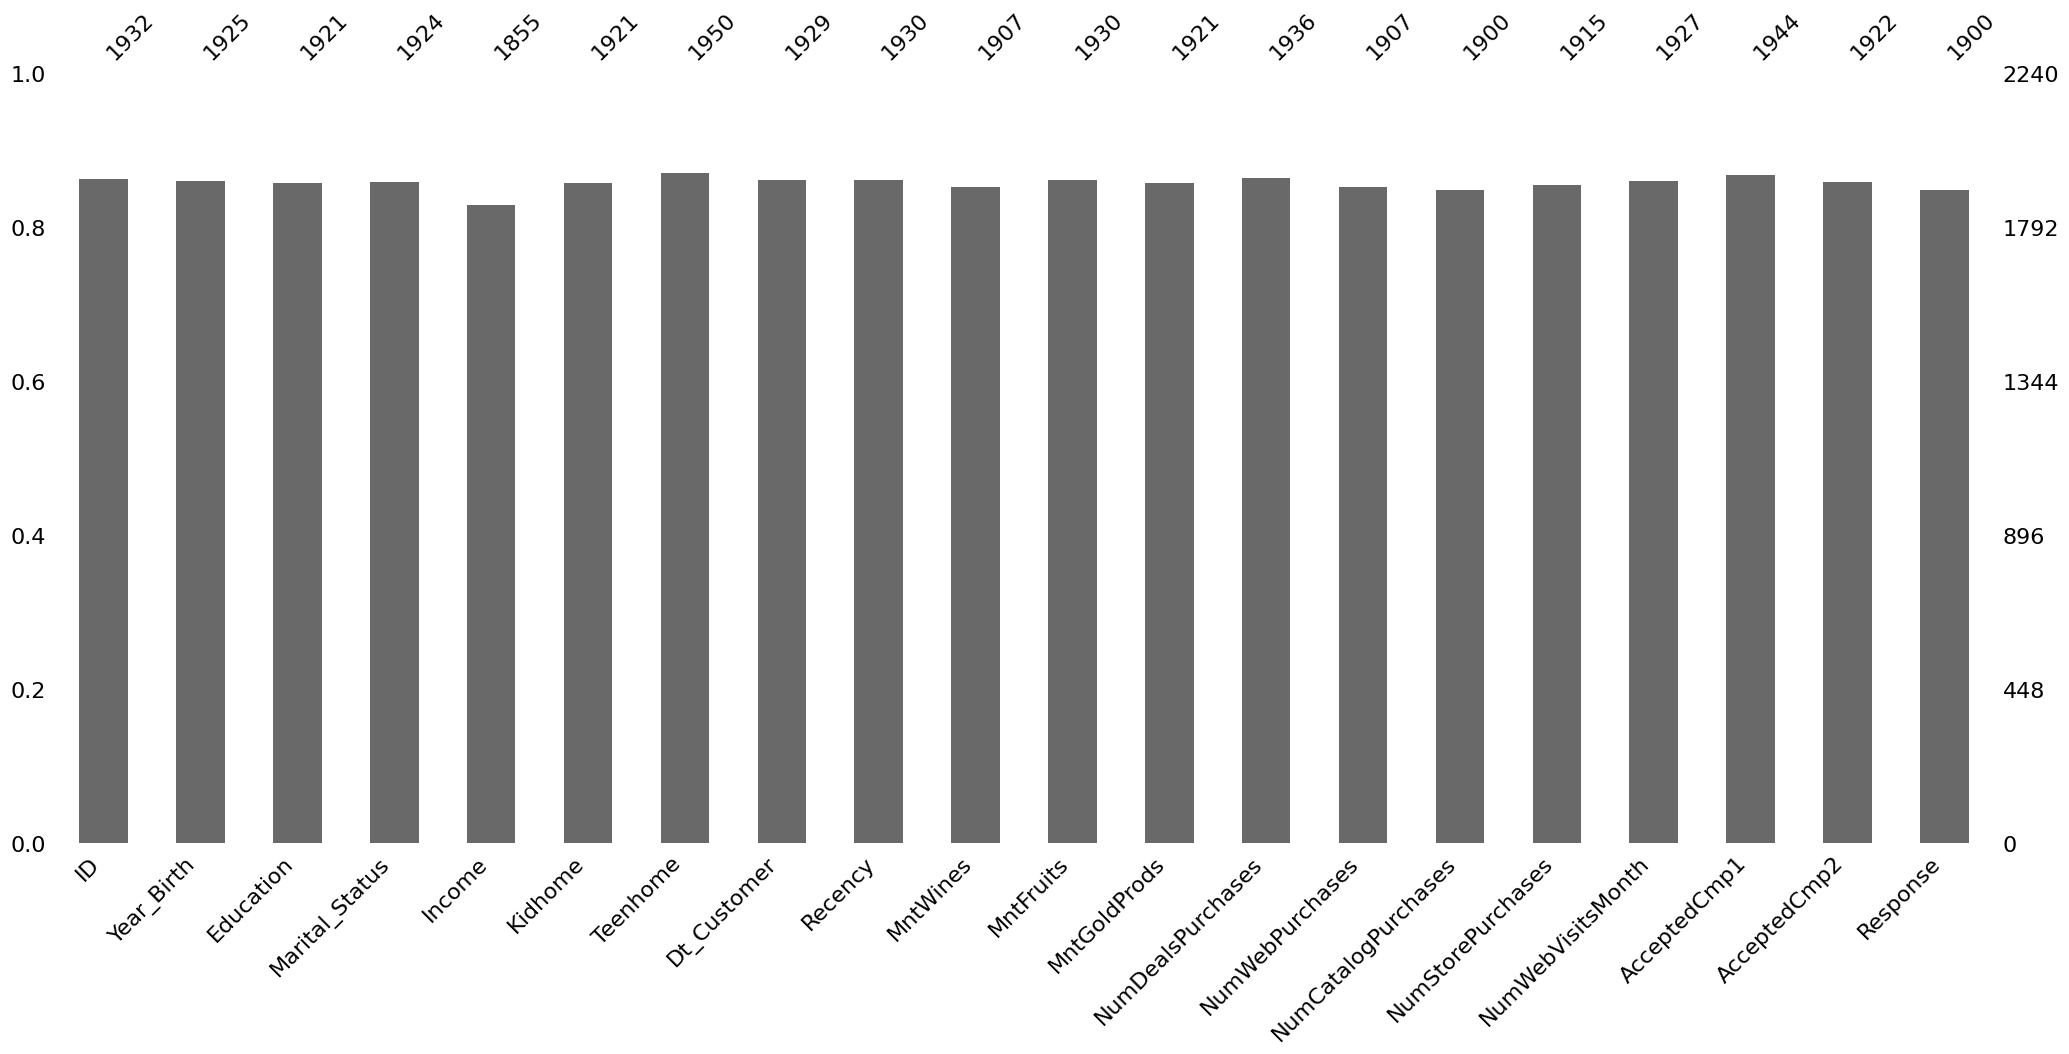

In [24]:
msno.bar(df)

In [25]:
df.Education.unique()

array(['Graduation', nan, 'PhD', 'Master', 'Basic', '2n Cycle',
       'Master Student'], dtype=object)

In [26]:
def encode(*arr):
    new = []
    for item in arr:
        if item == "Unknown":
            new.append(0)
        if item == "Basic":
            new.append(1)
        if item == "Graduation":
            new.append(2)
        if item == "Master Student" or item == "2n Cycle":
            new.append(3)
        if item == "Master":
            new.append(4)
        if item == "PhD":
            new.append(5)
    return new

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [27]:
imputer = KNNImputer()
df[["Recency","AcceptedCmp1","AcceptedCmp2"]] = imputer.fit_transform(df[["Recency","AcceptedCmp1","AcceptedCmp2"]])
df[["MntFruits","MntWines","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","Kidhome","Teenhome"]] =df[["MntFruits","MntWines","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","Kidhome","Teenhome"]].fillna(0)
df["Education"] = df["Education"].fillna("Unknown")
df["Year_Birth"] = df["Year_Birth"].fillna(math.floor(df["Year_Birth"].mean()))
df["Marital_Status"] = df["Marital_Status"].fillna("Single")
df["Income"] = df["Income"].fillna(df["Income"].median())
df = df.drop(columns=["ID","Dt_Customer"])
df = df.dropna()


<Axes: >

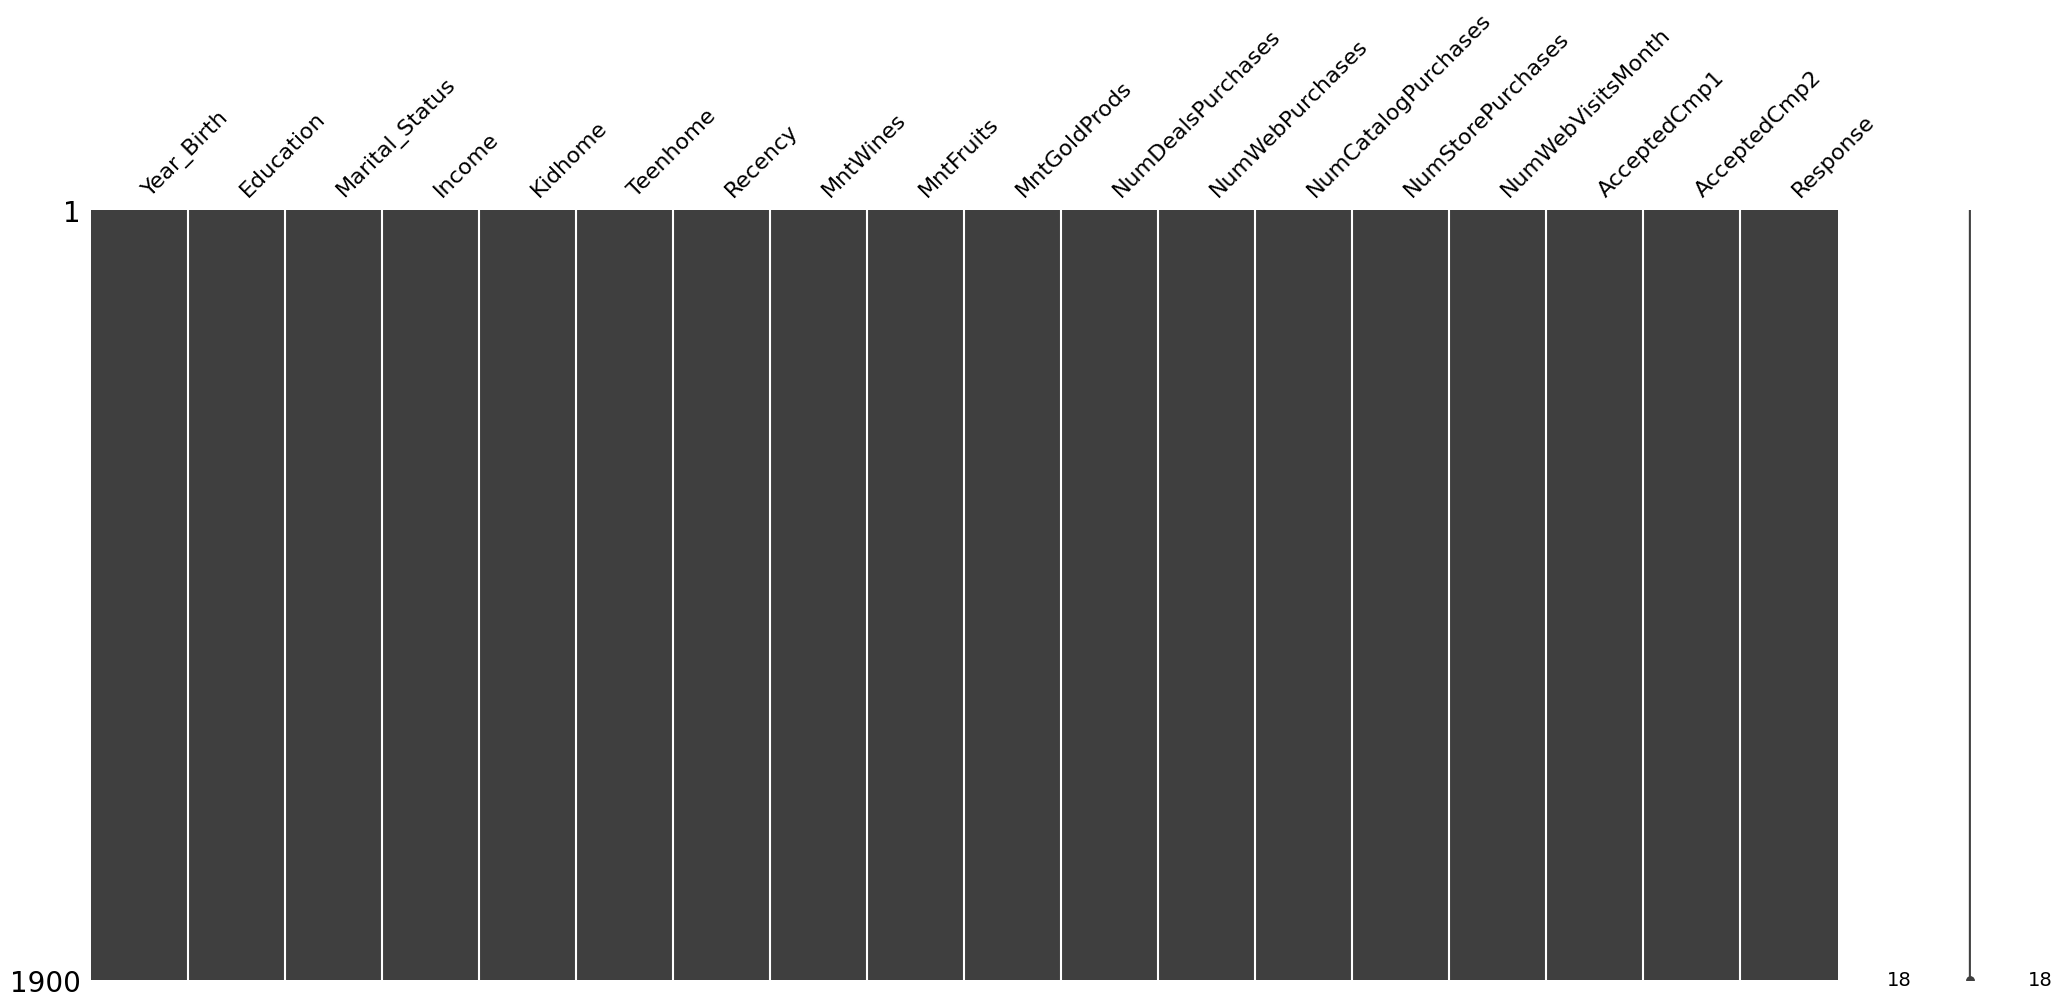

In [28]:
msno.matrix(df)

In [31]:
encoder = LabelEncoder()
df["Education"] = encoder.fit_transform(df["Education"])
df["Marital_Status"] = encoder.fit_transform(df["Marital_Status"])
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,1957.0,2,4,58138.0,0.0,0.0,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,1954.0,6,4,46344.0,1.0,1.0,27.0,0.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,1965.0,2,4,71613.0,0.0,0.0,26.0,0.0,49.0,42.0,0.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,1984.0,2,4,26646.0,1.0,0.0,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,1968.0,5,3,58293.0,1.0,0.0,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [32]:
X = df.drop('Response', axis=1)
y = df["Response"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Feature Preprocessing


Preprocess the features to make them ready for using the model

## K-Nearset Neighbors Classification

In [33]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
f1_score(y_test,y_predict)

np.float64(0.1694915254237288)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.